## Corner Detection

### What is a corner ?

### Harris Corner Dectection

### Shi-Thomasi Corner Dectection

### Harris Dectection Implementation


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

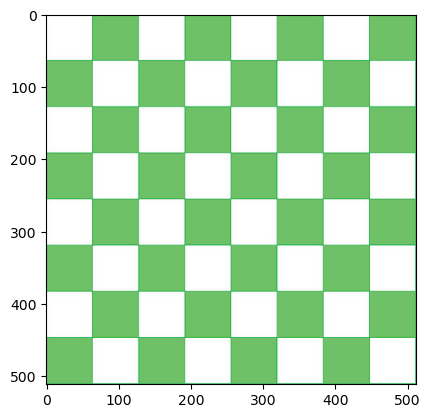

In [2]:
# Flat chess board 
flat_chess = cv2.imread('../dataset/img/flat_chessboard.jpg')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)
plt.show()

# Each of the squares are the point called corners and others are edges 

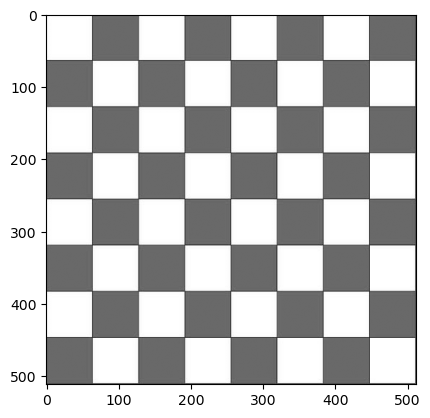

In [3]:
gray_fchess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_fchess, cmap='gray')
plt.show()

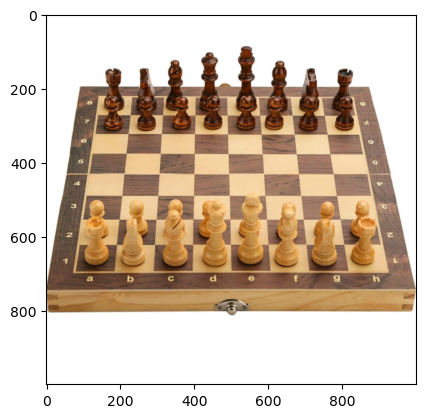

In [4]:
real_chess = cv2.imread('../dataset/img/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)
plt.show()

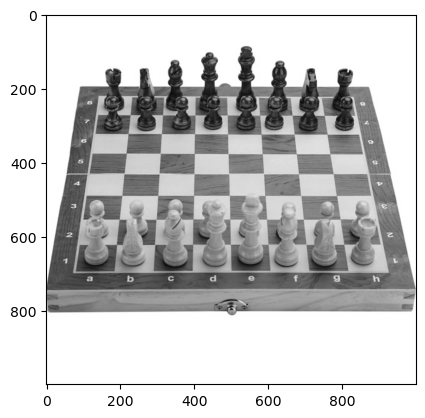

In [5]:
gray_rchess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_rchess, cmap='gray')
plt.show()

In [6]:
type(gray_fchess[0][0]) # intergers -> need to convert to float to work with harris detection

numpy.uint8

In [7]:
# Harris corner detection
gray = np.float32(gray_fchess)

# blocksize - neighborhood size to detect corners eigen values and vectors
# Ksize - Kernal size for sobel operator
# K - Harris detector free parameter
destination = cv2.cornerHarris(src = gray, blockSize = 2,  ksize = 3, k = 0.04)

In [8]:
# Erosion morphological operator
# to do the clear visualization of the results.
destination = cv2.dilate(destination, None) 

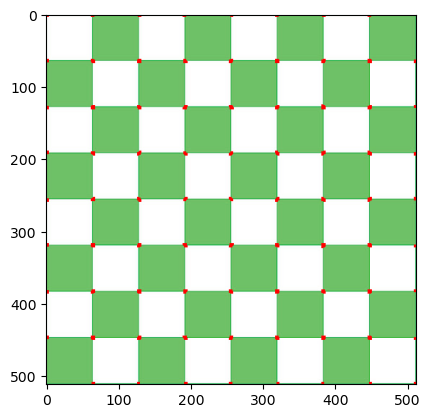

In [9]:
# we are showing original image with the corner detection result by the below formula.
# if any of the resulted array values greater than 1% of the max value of the result. 
# That point is the corner.
# we will color that as red - RGB

flat_chess[ destination > (0.01 * destination.max()) ] = [255,0,0]
plt.imshow(flat_chess)
plt.show()

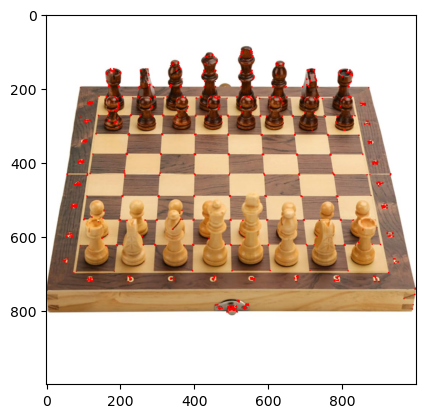

In [10]:
# Now we are doing it with real chess board image
# Step 1 - Conversion to float datatype is must 
gray = np.float32(gray_rchess)

# Step 2 - Harris corner detection 
result = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)

# Step 3 - Dilate to get cleary visualization (Morphological operator)
result = cv2.dilate(result, None)

# Step 4 - placing the detected corners in the original image
real_chess [ result > (0.01 * result.max()) ] = [255, 0, 0]

# display
plt.imshow(real_chess)
plt.show()


### Shi-Thomasi Corner Algorithm 

In [19]:
# Resetting

# Flat chessboard 
flat_chess = cv2.imread('../dataset/img/flat_chessboard.jpg')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

# real chessboard
real_chess = cv2.imread('../dataset/img/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

# gray scale on both chess
gray_fchess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
gray_rchess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

In [20]:
# shi thomasi detection

# 2 - maximum corners we want
# 3 - Quality level param (value we provided is multipled by the best corner quality measure 
# (minimal eigen value)
# 4 - minimum distance
corners = cv2.goodFeaturesToTrack(gray_fchess, 64, 0.01, 10)

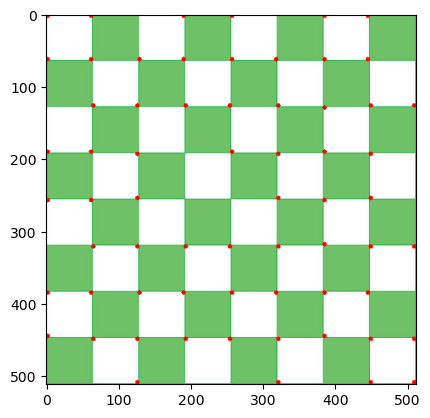

In [21]:
# shi doesn't mark corner like harris we need to add shapes to the corners

corners = np.intp(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess, (x,y), 3, (255,0,0), -1)

plt.imshow(flat_chess)
plt.show()

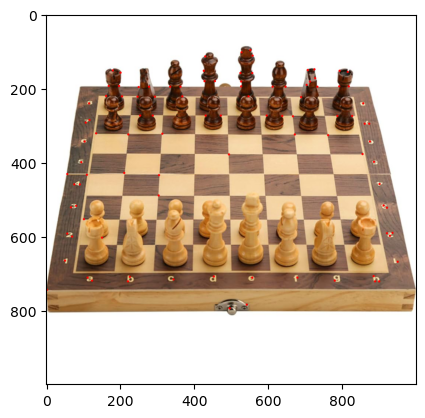

In [22]:
# On the real image

# Step 1 - shi algo method call with gray scale image
corners  = cv2.goodFeaturesToTrack(gray_rchess, 100, 0.1, 10)

# Step 2 - convert the float to int for the corners detected result
corners = np.intp(corners)

# Step 3 - place the corners as circle shape to the real image
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255,0,0), -1)

# Setp 4 - show the image with the corners detected 
plt.imshow(real_chess)
plt.show()